In [1]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=8607478e9da847aba1a42285c454c3ffb71564913bf5268f8b510d0869a85669
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)



In [4]:
# Step 2: Apply gates to demonstrate tensor product states
qc.x(0)  # Apply X gate on qubit 0 → |10>



In [5]:
# Step 3: Measure both qubits
qc.measure([0, 1], [0, 1])



In [6]:
# Step 4: Use AerSimulator (new standard in Qiskit 2.x)
simulator = AerSimulator()

# Transpile the circuit for the simulator
from qiskit import transpile
compiled_circuit = transpile(qc, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()



In [7]:
# Step 5: Display circuit and results
print("Measurement Results:", counts)
qc.draw('text')
plt.show()
plot_histogram(counts)
plt.show()

Measurement Results: {'01': 1024}


In [11]:
%matplotlib inline

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib
import matplotlib.pyplot as plt


matplotlib.use('Agg')
import io
from PIL import Image

def show_inline(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    display(Image.open(buf))
    plt.close(fig)

sim = AerSimulator()

H on both: {'11': 278, '10': 279, '00': 239, '01': 228}


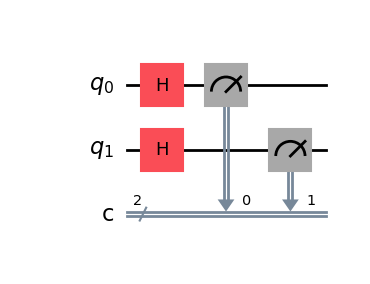

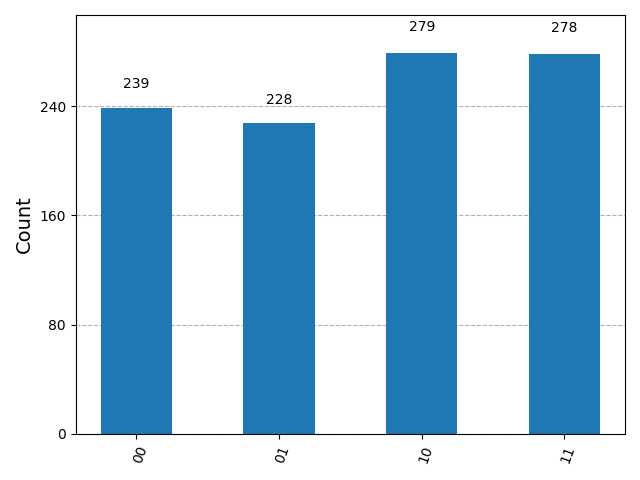

In [13]:
# --- Hadamard on both qubits ---

qc = QuantumCircuit(2, 2)
qc.h([0, 1])
qc.measure([0, 1], [0, 1])
res = sim.run(transpile(qc, sim), shots=1024).result()
print("H on both:", res.get_counts())
show_inline(qc.draw('mpl'))
show_inline(plot_histogram(res.get_counts()))

# Pattern: nearly equal probabilities for 00, 01, 10, 11

X on second qubit: {'10': 1024}


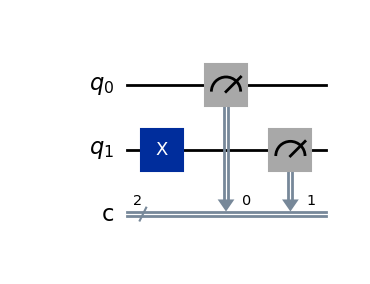

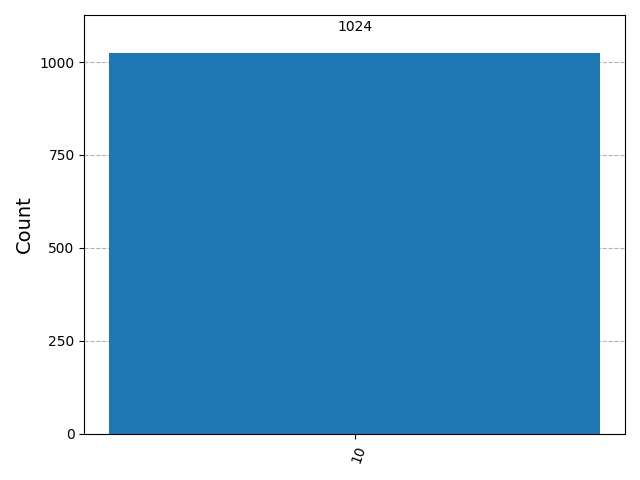

In [14]:
# --- Swap qubit roles ---

qc = QuantumCircuit(2, 2)
qc.x(1)
qc.measure([0, 1], [0, 1])
res = sim.run(transpile(qc, sim), shots=1024).result()
print("X on second qubit:", res.get_counts())
show_inline(qc.draw('mpl'))
show_inline(plot_histogram(res.get_counts()))

# Observation: output now 10 instead of 01

H + CNOT: {'00': 511, '11': 513}


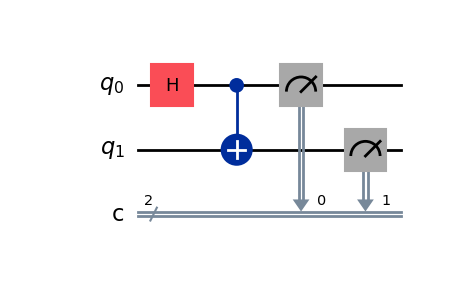

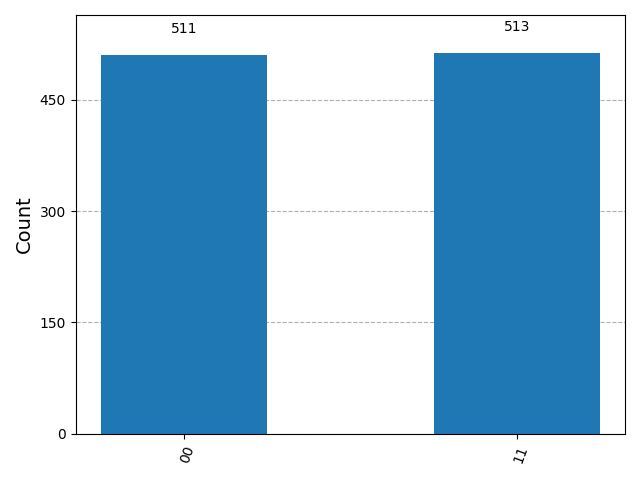

In [15]:
# --- Add CNOT after Hadamard ---

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
res = sim.run(transpile(qc, sim), shots=1024).result()
print("H + CNOT:", res.get_counts())
show_inline(qc.draw('mpl'))
show_inline(plot_histogram(res.get_counts()))

# Observation: only 00 and 11 appear — entangled (Bell) state

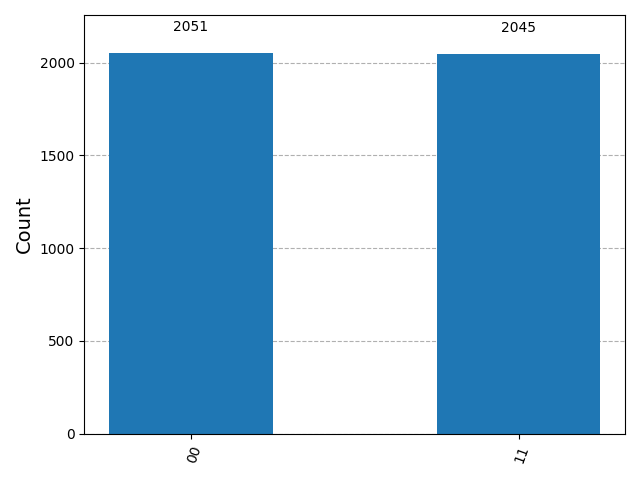

In [16]:
# --- Increase shots to 4096 ---

res = sim.run(transpile(qc, sim), shots=4096).result()
show_inline(plot_histogram(res.get_counts()))

# Observation: distribution becomes smoother and more stable

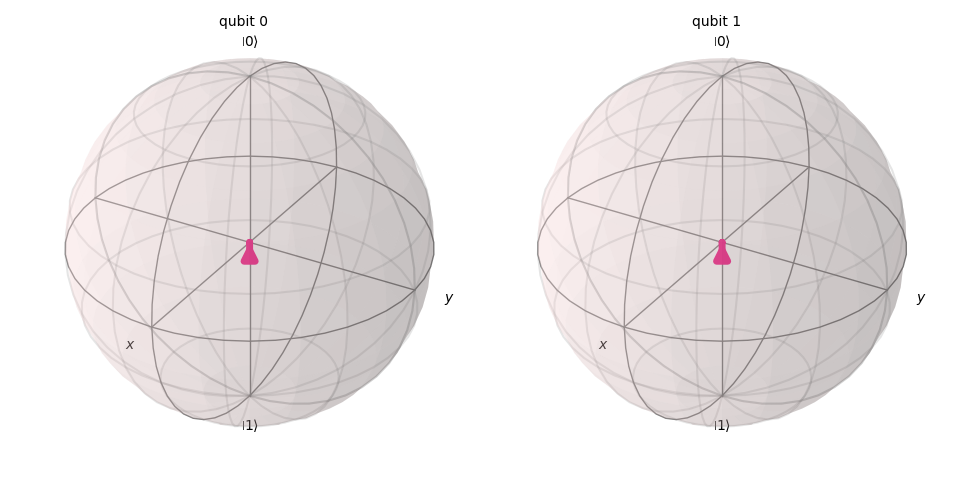

In [17]:
# --- Bloch sphere visualization ---

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
# IMPORTANT: use save_statevector()
state_sim = AerSimulator()
qc.save_statevector()
res = state_sim.run(transpile(qc, state_sim)).result()
state = res.data(0)['statevector']
show_inline(plot_bloch_multivector(state))

# Observation: Bloch spheres show correlated orientation — entanglement